# Neural Computation Exercises: Attention
In this execise your task is to implement the attention mechanism as it is used in the transformer model.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

Below, we are generating the data we will use:
* *keys* is a list of key vectors
* *values* is a list of value vectors
* *queries* is a list of query vectors

In [2]:
def make_data(keyLength = 8, valueLength = 16, items = 32, seed = 42, numItems = 64):
    np.random.seed(seed)
    keys = []
    values = []
    queries = []

    for i in range(numItems):
        if i%8 == 0:
            baseKeyQuery = np.random.randn(keyLength)*0.5 
            baseValue = np.random.rand(valueLength)*1 -0.5
        key = baseKeyQuery + np.random.randn(keyLength)*0.2
        query = baseKeyQuery + np.random.randn(keyLength)*0.2
        value = baseValue + np.random.rand(valueLength)*5 -2.5
        keys.append(key)
        queries.append(query)
        values.append(value)
    return keys,values,queries
    
    
keys, values, queries = make_data(keyLength = 8, valueLength = 16, items = 32, seed = 42, numItems = 64)

## Exercise 1: Implement attention for single query
Complete the function below.
The function should take a **list of keys** and a **list of values** as well as a **single query vector** as input.
It should then compute and return:
* a vector containing the attention scores for all keys with respect to the query vector as described in the lecture
* the result of the attention function as described in the lecture

In [3]:
def attentionQuery(query, keys, values):
    
    attention = []
    norm = np.sqrt(len(keys[0]))
    
    for k in keys:
        
        a = (query*k).sum() / norm
        a = np.exp(a)
        attention.append(a)
    attention = np.array(attention)
    attention /= attention.sum() 

    result = np.zeros(len(values[0]))
    for a,v in zip(attention,values):
        result = result + a*v
        
    return attention, result

## Exercise 2: Apply the function and plot the results
Apply the function to make a query using the first query-vector (*queries[0]*).
Make two barplots using [plt.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html):
* One plot showing the attention-scores (y-axis) for all key-indexes (x-axis).
* One showing the resulting of the attention operation showing the vector-element-values (y-axis) as function of  element-index (x-axis).  

Here, we use the function to compute the query for the first query vector. 

In [4]:
att, result =  attentionQuery(queries[0], keys, values)

Plotting the resulting attention scores.

Text(0, 0.5, 'Attention-score')

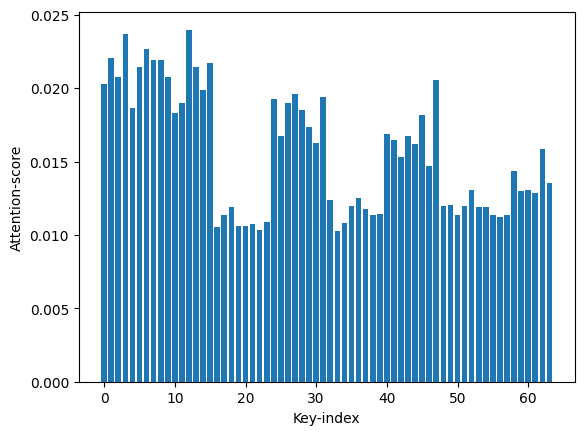

In [5]:
plt.bar(x = np.arange(len(att)), height = att)
plt.xlabel('Key-index')
plt.ylabel('Attention-score')

Text(0, 0.5, 'Element-value')

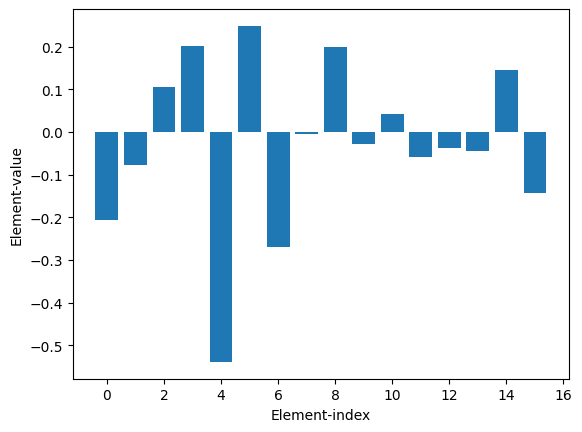

In [6]:
plt.bar(x = np.arange(len(result)), height = result)
plt.xlabel('Element-index')
plt.ylabel('Element-value')

## Exercise 3: Matrix-based implementation
The goal of this exercise is to implement a matrix-based version of the attention function.
We begin, by combining the lists of keys, values, and queries into matrices.

In [7]:
keys_mat = np.array(keys)
values_mat = np.array(values)
queries_mat = np.array(queries)

Complete the function below.
The function should take a **matrix of keys** and a **matrix of values** as well as a **matrix of queries** as input.
One key/value/query vector should be stored in each row.
It should then compute and return:
* a matrix containing attention-scores as described in the lecture
* a matrix containing the result of the attention function as described in the lecture

In [8]:
def attentionQueryMatrix(queries, keys, values):
    norm = np.sqrt(len(keys[0]))
    attention = np.matmul(queries,keys.transpose())/norm
    attention = np.exp(attention)
    attention = attention/attention.sum(axis = 1, keepdims=True)
    return attention, np.matmul(attention,values)

## Exercise 4: Apply the function and plot the results
Apply the function to make a query using all queries.
Make two plots:
* One plot showing all attention-scores using a heatmap. You can use [plt.imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html). Label the [x-axes](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlabel.html) and [y-axes](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.ylabel.html), which corresponds to the index of the query-vector, which to the index of the key-vector? Add a [colour bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html).
* One showing the results of the attention operation corresponding to the first query (*queries[0]*) this plot showld be identical to the corresponding one from Exercise 2. 

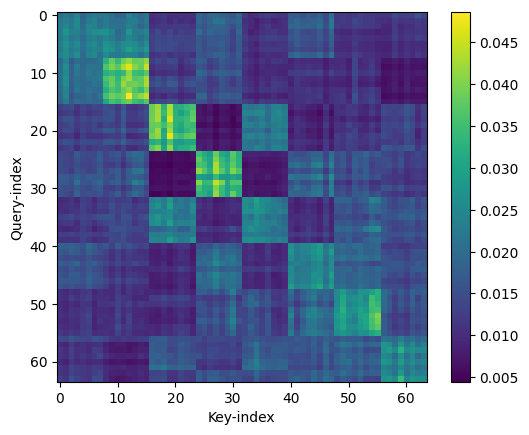

(64, 8)

In [9]:
attentions, results = attentionQueryMatrix(queries_mat, keys_mat, values_mat)
plt.imshow(attentions)
plt.xlabel('Key-index')
plt.ylabel('Query-index')
plt.colorbar()
plt.show()
keys_mat.shape

Text(0, 0.5, 'Element-value')

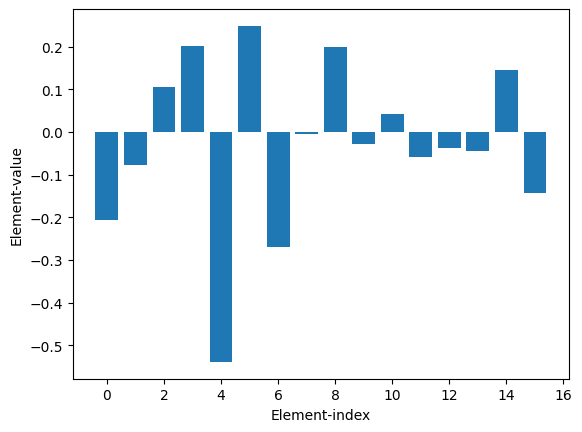

In [10]:
plt.bar(x = np.arange(len(result)), height = results[0])
plt.xlabel('Element-index')
plt.ylabel('Element-value')

In [11]:
attentions = np.zeros((len(keys),len(keys)))
for i in range (len(keys)):
    a, _ = attentionQuery(queries[i], keys, values)
    attentions[i,:] = a

## Exercise 5: Masked attention
Implement a masked version of your matrix based function that ensures, no query can pay **attention to future items**. I.e., make sure that the corresponding attention scores are zero.
Note that this is a bit different form the explanation in the lecture video, where also attention to the token itself were forbidden. This is due to the [shift of the output](https://discuss.pytorch.org/t/meaning-of-outputs-shifted-right/63124) that was not considered in the lecture.
The entries for each query should still sum to 1.

**Tip:** you can use a [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) to achieve this. You don't have to.

In [12]:
def maskedAttentionQueryMatrix(queries, keys, values):
    norm = np.sqrt(len(keys[0]))
    attention = np.matmul(queries,keys.transpose())/norm
    attention = np.exp(attention)
    xs, ys = np.meshgrid(np.arange(attention.shape[1]), np.arange(attention.shape[0]))
    attention[ys<xs] = 0
    attention = attention/attention.sum(axis = 1, keepdims=True)
    return attention, np.matmul(attention,values)

## Exercise 6: Apply the masked  function and plot the results
Apply the new function to make a query using all queries.
Make the same two plots as in Exercise 4:
* One plot showing all attention-scores using a heatmap. You can use [plt.imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html). Label the [x-axes](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlabel.html) and [y-axes](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.ylabel.html), which corresponds to the index of the query-vector, which to the index of the key-vector? Add a [colour bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html).
* One showing the results of the attention operation corresponding to the first query (*queries[0]*) this plot showld be identical to the corresponding one from Exercise 2. 

Text(0, 0.5, 'Element-value')

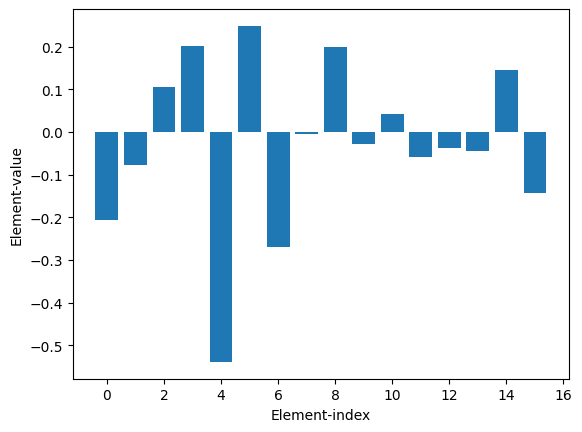

In [13]:
plt.bar(x = np.arange(len(result)), height = results[0])
plt.xlabel('Element-index')
plt.ylabel('Element-value')

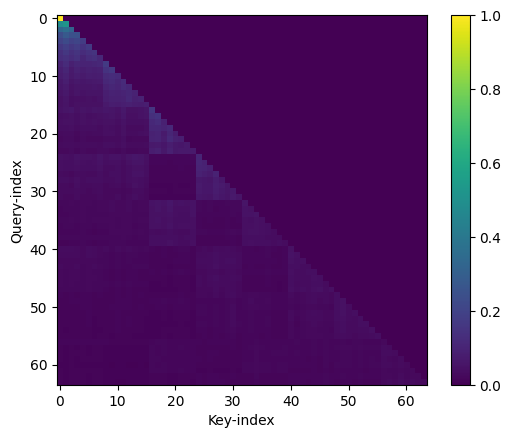

(64, 8)

In [14]:
attentions, results = maskedAttentionQueryMatrix(queries_mat, keys_mat, values_mat)
plt.imshow(attentions)
plt.xlabel('Key-index')
plt.ylabel('Query-index')
plt.colorbar()
plt.show()
keys_mat.shape